In [1]:
import numpy as np
import os,cv2,glob
import matplotlib.pyplot as plt
%matplotlib inline 

6000


D:\AiClass\envs\ai39\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


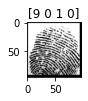

In [5]:
#real指紋部分

img_list = sorted(glob.glob('./figerPimg/fingerReal/*.BMP'))
print(len(img_list))

#轉成彩色圖rasnet50 才能用
imgs = np.empty((len(img_list), 96, 96, 3), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img
    
    # 類別 id, gender, lr, finger
    labels[i] = extract_label(img_path)
    
np.savez('./figerPimg/datasetFP/x_real_fp.npz', data=imgs)
np.save('./figerPimg/datasetFP/y_real_fp.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1])


17931


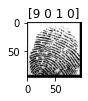

In [8]:
#easy指紋部分

img_list = sorted(glob.glob('./figerPimg/fingerAltered/Easy/*.BMP'))
print(len(img_list))

#轉成彩色圖rasnet50 才能用
imgs = np.empty((len(img_list), 96, 96, 3), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img
    
    # 類別 id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.savez('./figerPimg/datasetFP/x_easy_fp.npz', data=imgs)
np.save('./figerPimg/datasetFP/y_easy_fp.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1])

17067


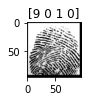

In [9]:
#medium指紋部分

img_list = sorted(glob.glob('./figerPimg/fingerAltered/Medium/*.BMP'))
print(len(img_list))

#轉成彩色圖rasnet50 才能用
imgs = np.empty((len(img_list), 96, 96, 3), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img
    
    # 類別 id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.savez('./figerPimg/datasetFP/x_medium_fp.npz', data=imgs)
np.save('./figerPimg/datasetFP/y_medium_fp.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1])

14272


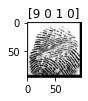

In [10]:
#Hard指紋部分

img_list = sorted(glob.glob('./figerPimg/fingerAltered/Hard/*.BMP'))
print(len(img_list))

#轉成彩色圖rasnet50 才能用
imgs = np.empty((len(img_list), 96, 96, 3), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img
    
    # 類別 id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.savez('./figerPimg/datasetFP/x_hard_fp.npz', data=imgs)
np.save('./figerPimg/datasetFP/y_hard_fp.npy', labels)

plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1])

In [2]:
def extract_label(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)


In [7]:
def extract_label2(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)
